### Basic Data Checks

In [208]:
'''
Import pandas library
Using which we load the data for basic information. 
'''
import pandas as pd

'''
Assumption: Data file kept in the same location of this notebook. 
'''
uber_raw_data = pd.read_csv("Uber Request Data.csv")

'''
check basic statistics of the raw data. 
'''
print("basic statistics: ")
print(uber_raw_data.describe())
print()

'''
Check Data Types
'''
print("data types: ")
print(uber_raw_data.dtypes)
print()

'''
check sample 20 rows to understand data issues and values in available columns. 
'''
print("20 Sample rows: ")
print(uber_raw_data.head(20))
print()

'''
check count of records per pickup point. 
'''
print("Count of Records per Pickup Point: ")
print(uber_raw_data.groupby(['Pickup point'])['Request id'].count())
print()

'''
check count of records per Status
''' 
print("Count of Records Per Status: ")
print(uber_raw_data.groupby(['Status'])['Request id'].count())
print()


basic statistics: 
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

data types: 
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

20 Sample rows: 
    Request id Pickup point  Driver id          Status    Request timestamp  \
0          619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1          867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2         1807         City        1.0  Trip Completed       12/7/2016 9:17   
3         2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4         3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

### Cleaning Data - Round # 1

In [209]:
'''
Initial set of data cleaning. 
Simply convert the date/time columns from String to Date Time. 
'''

uber_data_with_dtime = pd.DataFrame(uber_raw_data)
uber_data_with_dtime['Request timestamp'] = pd.to_datetime(uber_data_with_dtime['Request timestamp'],dayfirst=True)
uber_data_with_dtime['Drop timestamp'] = pd.to_datetime(uber_data_with_dtime['Drop timestamp'],dayfirst=True)

'''
Verify if the datatype is now Datetime for Date/Time columns
'''
print("After Initial Cleaning: \n")
print(uber_data_with_dtime.dtypes,"\n")

'''
print sample of 20 records to check data itself as well. 
'''
print("Sample 20 Records after Date Time conversions: \n")
print(uber_data_with_dtime.head(20))


After Initial Cleaning: 

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object 

Sample 20 Records after Date Time conversions: 

    Request id Pickup point  Driver id          Status   Request timestamp  \
0          619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1          867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2         1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3         2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4         3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
5         3879      Airport        1.0  Trip Completed 2016-07-13 21:57:28   
6         4270      Airport        1.0  Trip Completed 2016-07-14 06:15:32   
7         5510      Airport        1.0  Trip Completed 2016-07-15 05:

### Visualizing Trends - Round # 1

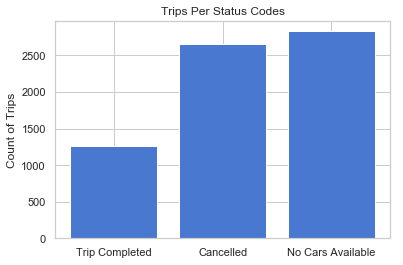

In [210]:
'''
Understanding the data based on Status of Trips. 
'''

'''
import the required libraries
'''
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_status = np.arange(len(uber_data_with_dtime.Status.unique()))
status_types = tuple(uber_data_with_dtime.Status.unique())
status_types_counts = list(uber_data_with_dtime.groupby(['Status']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_status, status_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_status, status_types)
plt.ylabel('Count of Trips')
plt.title('Trips Per Status Codes')
plt.show()


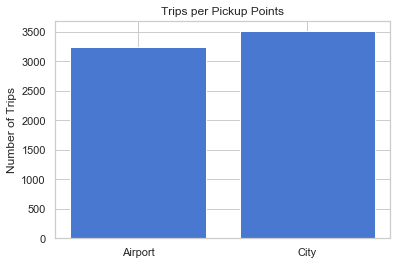

In [211]:
'''
Understanding the data based on Pickup Point of Trips. 
'''

'''
import the required libraries
'''
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(uber_data_with_dtime['Pickup point'].unique()))
trip_types = tuple(uber_data_with_dtime['Pickup point'].unique())
trip_types_counts = list(uber_data_with_dtime.groupby(['Pickup point']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips per Pickup Points')
plt.show()


### Cleaning Data - Round # 2

In [212]:
'''
From the date/time fields we now extract the date, hour, year and month variables 
these can be used for further analysis. 
'''

uber_data_with_dtime['year'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.year)
uber_data_with_dtime['month'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.month)
uber_data_with_dtime['day'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.day)
uber_data_with_dtime['hour'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.hour)
uber_data_with_dtime['date'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.date())
uber_data_with_dtime['day_name'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.day_name())
uber_data_with_dtime['month_name'] = uber_data_with_dtime['Request timestamp'].apply(lambda x: x.month_name())

'''
Checking sample of the data post changes. 
'''
uber_data_with_dtime.head(10)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,year,month,day,hour,date,day_name,month_name
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,2016-07-11,Monday,July
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,2016-07-11,Monday,July
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,2016-07-12,Tuesday,July
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,2016-07-12,Tuesday,July
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,2016-07-13,Wednesday,July
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016,7,13,21,2016-07-13,Wednesday,July
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016,7,14,6,2016-07-14,Thursday,July
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016,7,15,5,2016-07-15,Friday,July
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016,7,15,17,2016-07-15,Friday,July
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016,7,11,6,2016-07-11,Monday,July


### Visualizing Trends - Round # 2

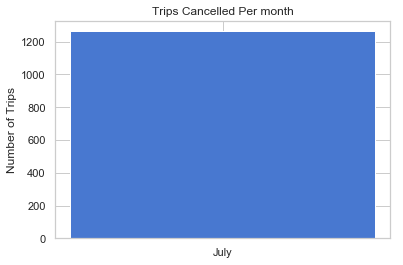

In [213]:
'''
Find for which month most number of cancellations happened. 
'''

'''
create dataframe with only the cancelled trips information
'''
cancelled_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "Cancelled"]

'''
check the count of records for cancellation. 
'''
cancelled_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(cancelled_trips['month_name'].unique()))
trip_types = tuple(cancelled_trips['month_name'].unique())
trip_types_counts = list(cancelled_trips.groupby(['month_name']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips Cancelled Per month')
plt.show()

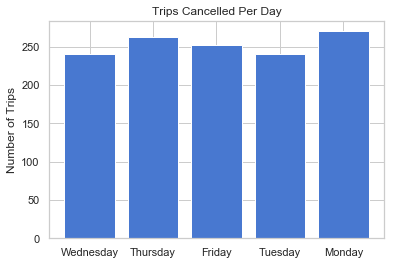

In [223]:
'''
Find for which month and which particular day, if any, for July month
when most number of cancellations happened. 
'''

'''
create dataframe with only the cancelled trips information
'''
cancelled_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "Cancelled"]
cancelled_trips = cancelled_trips[cancelled_trips.month_name == "July"]

'''
check the count of records for cancellation. 
'''
cancelled_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(cancelled_trips['day_name'].unique()))
trip_types = tuple(cancelled_trips['day_name'].unique())
trip_types_counts = list(cancelled_trips.groupby(['day_name']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips Cancelled Per Day')
plt.show()


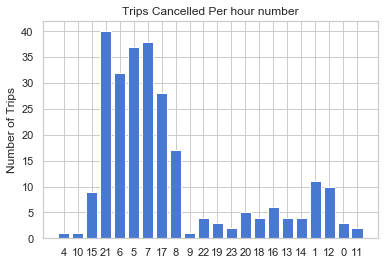

In [234]:
'''
Find for which month and which particular hour, if any, on July month on Monday 
when most number of cancellations happened. 
'''

'''
create dataframe with only the cancelled trips information
'''
cancelled_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "Cancelled"]
cancelled_trips = cancelled_trips[cancelled_trips.month_name == "July"]
cancelled_trips = cancelled_trips[cancelled_trips.day_name == "Monday"]

'''
check the count of records for cancellation. 
'''
cancelled_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.sort(np.arange(len(cancelled_trips['hour'].unique())))
trip_types = tuple(cancelled_trips['hour'].unique())
trip_types_counts = list(cancelled_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips Cancelled Per hour number')
plt.show()

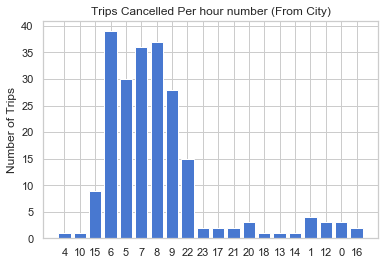

In [235]:
'''
Find for which month and which particular hour, if any, on July month of Mondays 
when most number of cancellations happened where pickup was from City
'''

'''
create dataframe with only the cancelled trips information
'''
cancelled_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "Cancelled"]
cancelled_trips = cancelled_trips[cancelled_trips.month_name == "July"]
cancelled_trips = cancelled_trips[cancelled_trips.day_name == "Monday"]
cancelled_trips = cancelled_trips[cancelled_trips['Pickup point'] == "City"]

'''
check the count of records for cancellation. 
'''
cancelled_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.sort(np.arange(len(cancelled_trips['hour'].unique())))
trip_types = tuple(cancelled_trips['hour'].unique())
trip_types_counts = list(cancelled_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips Cancelled Per hour number (From City)')
plt.show()

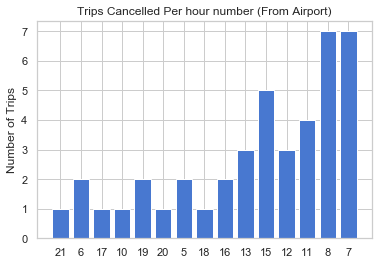

In [226]:
'''
Find for which month and which particular hour, if any, on July month of Mondays 
when most number of cancellations happened where pickup was from Airport
'''

'''
create dataframe with only the cancelled trips information
'''
cancelled_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "Cancelled"]
cancelled_trips = cancelled_trips[cancelled_trips.month_name == "July"]
cancelled_trips = cancelled_trips[cancelled_trips.day_name == "Monday"]
cancelled_trips = cancelled_trips[cancelled_trips['Pickup point'] == "Airport"]

'''
check the count of records for cancellation. 
'''
cancelled_trips.count()

'''
sort the cancelled_trips dataframe as per hour number
''' 
cancelled_trips.sort_values(by=['hour'])

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.sort(np.arange(len(cancelled_trips['hour'].unique())))
trip_types = tuple(cancelled_trips['hour'].unique())
trip_types_counts = list(cancelled_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Trips Cancelled Per hour number (From Airport)')
plt.show()

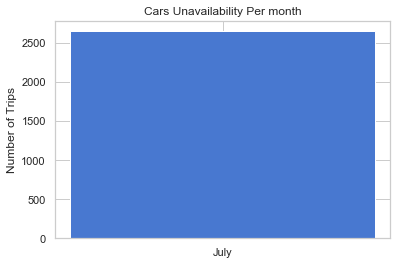

In [227]:
'''
Find for which month most number of unavailability happened. 
'''

'''
create dataframe with only the cancelled trips information
'''
unavailable_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "No Cars Available"]

'''
check the count of records for cancellation. 
'''
unavailable_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(unavailable_trips['month_name'].unique()))
trip_types = tuple(unavailable_trips['month_name'].unique())
trip_types_counts = list(unavailable_trips.groupby(['month_name']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Cars Unavailability Per month')
plt.show()

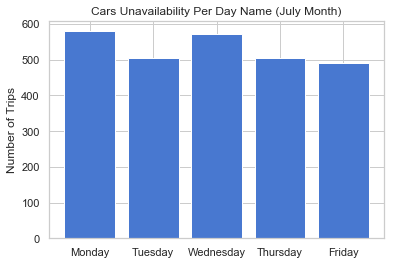

In [228]:
'''
Find for day, if any, when in July month, most number of unavailability cases happened
'''

'''
create dataframe with only the cancelled trips information
'''
unavailable_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "No Cars Available"]
unavailable_trips = unavailable_trips[unavailable_trips['month_name'] == "July"]

'''
check the count of records for cancellation. 
'''
unavailable_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(unavailable_trips['day_name'].unique()))
trip_types = tuple(unavailable_trips['day_name'].unique())
trip_types_counts = list(unavailable_trips.groupby(['day_name']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Cars Unavailability Per Day Name (July Month)')
plt.show()

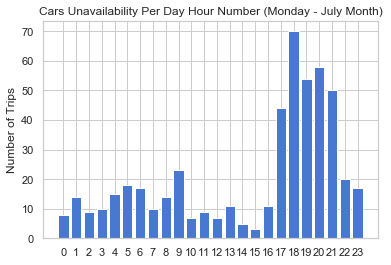

In [230]:
'''
Find for a particular hour in a day, if any, when in July month, most number of unavailability cases happened
'''

'''
create dataframe with only the cancelled trips information
'''
unavailable_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "No Cars Available"]
unavailable_trips = unavailable_trips[unavailable_trips['month_name'] == "July"]
unavailable_trips = unavailable_trips[unavailable_trips['day_name'] == "Monday"]

'''
check the count of records for cancellation. 
'''
unavailable_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(unavailable_trips['hour'].unique()))
trip_types = tuple(unavailable_trips['hour'].unique())
trip_types_counts = list(unavailable_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Cars Unavailability Per Day Hour Number (Monday - July Month)')
plt.show()

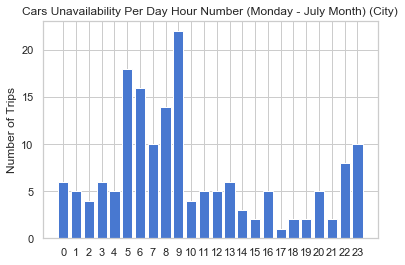

In [232]:
'''
Find for a particular hour in a day, if any, when in July month, most number of unavailability cases happened
check for trips from City to airport
'''

'''
create dataframe with only the cancelled trips information
'''
unavailable_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "No Cars Available"]
unavailable_trips = unavailable_trips[unavailable_trips['month_name'] == "July"]
unavailable_trips = unavailable_trips[unavailable_trips['day_name'] == "Monday"]
unavailable_trips = unavailable_trips[unavailable_trips['Pickup point'] == "City"]

'''
check the count of records for cancellation. 
'''
unavailable_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(unavailable_trips['hour'].unique()))
trip_types = tuple(unavailable_trips['hour'].unique())
trip_types_counts = list(unavailable_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Cars Unavailability Per Day Hour Number (Monday - July Month) (City)')
plt.show()

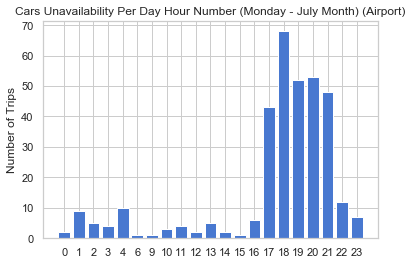

In [233]:
'''
Find for a particular hour in a day, if any, when in July month, most number of unavailability cases happened
check for trips from Airport to City
'''

'''
create dataframe with only the cancelled trips information
'''
unavailable_trips = uber_data_with_dtime[uber_data_with_dtime['Status'] == "No Cars Available"]
unavailable_trips = unavailable_trips[unavailable_trips['month_name'] == "July"]
unavailable_trips = unavailable_trips[unavailable_trips['day_name'] == "Monday"]
unavailable_trips = unavailable_trips[unavailable_trips['Pickup point'] == "Airport"]

'''
check the count of records for cancellation. 
'''
unavailable_trips.count()

'''
creating variables for status Types and counts of each type
to create a bar chart to understand the variety of statuses. 
'''
count_of_distinct_trips = np.arange(len(unavailable_trips['hour'].unique()))
trip_types = tuple(unavailable_trips['hour'].unique())
trip_types_counts = list(unavailable_trips.groupby(['hour']).count()['Request id'])

'''
plot the bar chart
'''
plt.bar(count_of_distinct_trips, trip_types_counts, align='center', alpha=1)
plt.xticks(count_of_distinct_trips, trip_types)
plt.ylabel('Number of Trips')
plt.title('Cars Unavailability Per Day Hour Number (Monday - July Month) (Airport)')
plt.show()